In [1]:
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns

# Đọc file chứa dữ liệu và in ra tiêu đề các cột

In [2]:
data = pd.read_csv('../data/Skin_NonSkin.csv')
print(list(data.columns))
print(data.shape)

['Blue', 'Green', 'Red', 'Skin']
(245057, 4)


In [3]:
data.head()

,Blue,Green,Red,Skin
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


# Vẽ đồ thị phân bổ dữ liệu stabf và số lượng mẫu

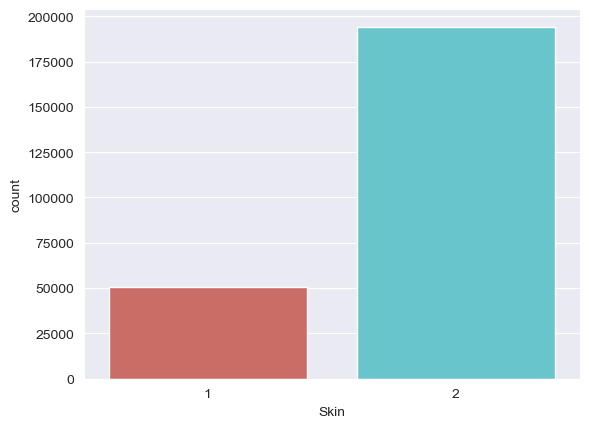

In [4]:
sns.countplot(x='Skin', data=data, palette='hls')
plt.show()

# Chuyển đổi dữ liệu cột đầu ra như sau: 1->0, 2->1

In [5]:
data['Skin'] = data['Skin'] - 1
data.head()

,Blue,Green,Red,Skin
0,74,85,123,0
1,73,84,122,0
2,72,83,121,0
3,70,81,119,0
4,70,81,119,0


# Chuyển dữ liệu thành mảng

In [6]:
X = np.array(data.loc[:, data.columns != 'Skin'])
print(X)

[[ 74  85 123]
 [ 73  84 122]
 [ 72  83 121]
 ...
 [163 162 112]
 [163 162 112]
 [255 255 255]]


In [7]:
y = np.array(data.loc[:, data.columns == 'Skin'])
print(y)

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


# Phân chia tập dữ liệu ra thành 2 tập: tập huấn luyện và tập kiểm tra

In [8]:
train_features, test_features, train_targets, test_targets = train_test_split(X, y, test_size=0.95, random_state=0)
print("##### Training and Test datasets #####")
print("Training size: ", len(train_targets))
print("Test size    : ", len(test_targets))

##### Training and Test datasets #####
Training size:  12252
Test size    :  232805


# Biến đổi kích thước ma trận dữ liệu huấn luyện kiểm tra

In [9]:
train_targets = train_targets.reshape(train_targets.shape[0])
test_targets = test_targets.reshape(test_targets.shape[0])
print(train_targets)

[1 1 1 ... 1 0 1]


# Vẽ đồ thị

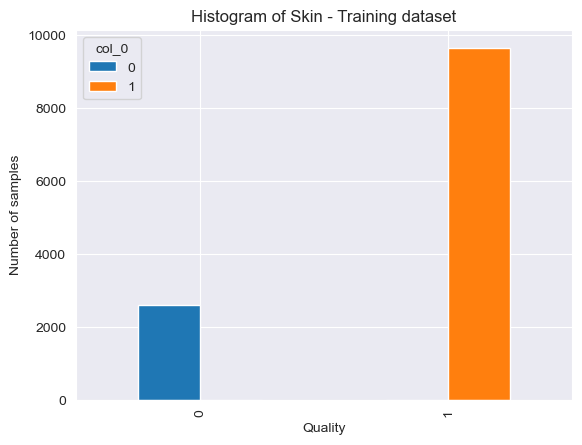

In [10]:
pd.crosstab(train_targets, train_targets).plot(kind='bar')
plt.title('Histogram of Skin - Training dataset')
plt.xlabel('Quality')
plt.ylabel('Number of samples')
plt.rc("font", size=14)

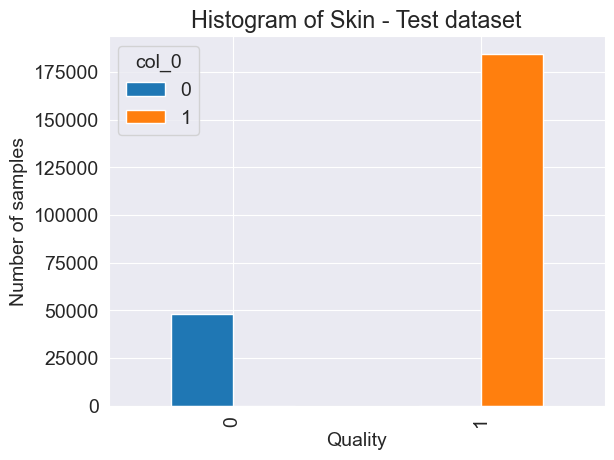

In [11]:
pd.crosstab(test_targets, test_targets).plot(kind='bar')
plt.title('Histogram of Skin - Test dataset')
plt.xlabel('Quality')
plt.ylabel('Number of samples')
plt.rc("font", size=14)

# Tạo mô hình sử dụng thuật toán SVM, huấn luyện mô hình

In [12]:
svmClassifier = SVC(kernel='linear', C=10)
svmClassifier.fit(train_features, train_targets)
print(svmClassifier.coef_)
print(svmClassifier.intercept_)

[[ 0.01654937 -0.00482597 -0.01950881]]
[1.89284263]


# Hiển thị độ chính xác của mô hình đối với tập huấn luyện

In [13]:
train_predictions = svmClassifier.predict(train_features)
print("##### Training - Prediction results of SVM #####")
print("Target labels: ", train_targets)
print("Predictions  : ", train_predictions)

##### Training - Prediction results of SVM #####
Target labels:  [1 1 1 ... 1 0 1]
Predictions  :  [1 1 1 ... 1 0 1]


In [14]:
accuracy = accuracy_score(train_targets, train_predictions) * 100
print("##### Training - Prediction accuracy of SVM #####")
print("Accuracy: ", accuracy, "%")
print(classification_report(train_targets, train_predictions))

##### Training - Prediction accuracy of SVM #####
Accuracy:  92.67058439438459 %
              precision    recall  f1-score   support

           0       0.77      0.94      0.84      2601
           1       0.98      0.92      0.95      9651

    accuracy                           0.93     12252
   macro avg       0.88      0.93      0.90     12252
weighted avg       0.94      0.93      0.93     12252

